# **Proyecto final**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Jueves 18 de enero, 9:59pm. **NO HABRÁN PRÓRROGAS**
- Grupos de dos personas por elección libre
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom

El propósito de este proyecto es que tengan un código de su autoría publicado en GitHub

## Página web

> Según lo discutido en la última clase, **deberán crear su propia página web usando GitHub Pages**. En ella, deberán mostrar el notebook de su proyecto final

Recursos adicionales:

1. Videos tutoriales
    - https://www.youtube.com/watch?v=zyGfECfJ9BY
    - https://www.youtube.com/watch?v=K5xImVmm2Ds


2. Plantillas
    - https://bootstrapmade.com/bootstrap-portfolio-templates/
    - https://cssauthor.com/free-bootstrap-portfolio-templates/

Incluya aquí el link de sus páginas web
- Integrante 1: Nestor Canales
- Integrante 2: Adriana Torres https://adrianatorres3.github.io/

## Aplicación

Pautas generales

- Insumos: deberán trabajar al menos dos (2) bases de datos diferentes que requieran alguna transformación (`data wrangling`). Una de ellas tiene que ser un archivo de texto (`.txt`, `.pdf`, `.docx`, etc)
- Tareas: (i) explicar la relevancia del análisis a desarrollar; (ii) utilizar al menos una vez listas, loops y functions para transformar la base de datos cruda y obtener información relevanete; y (iii) aplicar algoritmos de NLP para transformar texto en datos valiosos
- Deberán proveer obligatoriamente gráficos (2 o más) y tablas/cuadros (2 o más) de su libre elección y conclusiones relevantes

Posibles datos para el ejercicio de `data wrangling`

- Estadísticas de 100 años del BCRP. Más [aquí](https://www.bcrp.gob.pe/en/estadisticas/estadisticas-de-100-anos-del-bcrp.html)
- 1,000 años de datos macroeconómicos en Reino Unido. Más [aquí](https://www.kaggle.com/datasets/bank-of-england/a-millennium-of-macroeconomic-data)
- Historial crediticio - Datathon Interbank 2020. Más [aquí](https://www.kaggle.com/competitions/interbank20/data?select=censo_test.csv)
- Ataques terroristas en el mundo. Más [aquí](https://www.kaggle.com/code/gpreda/global-terrorist-attacks/input)
- [World Hapiness Report 2023](https://worldhappiness.report/), compilado por Carla Solís. Más [aquí](https://raw.githubusercontent.com/ccsuehara/python_para_las_ccss/main/Clase%205/data/world-happiness-report-2023.csv)
- Otros datos del BCRP, MEF, SBS, SMV, BVL, INEI, etc.
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos


Posibles datos para el ejercicio de NLP

- Federal Open Market Committee (FOMC) meetings statements. Más [aquí](https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm). El repo incluye tres archivos `.docx`
- Programa Monetario del Banco Central de Reserva del Perú (BCRP). Más [aquí](https://www.bcrp.gob.pe/transparencia/actividades-oficiales/notas-informativas.html). El repo incluye tres archivos `.pdf`
- Mensajes presidenciales de Carla Solís y Luis Eduardo San Martín. [Acá](https://github.com/ccsuehara/Peruvian-presidents-speeches/tree/master/data/presidentialSpeechPeru/txt) los archivos
- "Fake vs real news" de George McIntire. Más info [aquí](https://opendatascience.com/how-to-build-a-fake-news-classification-model/). La base de datos está alojada en su [repo](https://github.com/GeorgeMcIntire/fake_real_news_dataset?tab=readme-ov-file)
- Coronavirus tweets de Kaggle. Más info [aquí](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)
- Twitter Financial News de Kaggle. Más infor [aquí](https://www.kaggle.com/datasets/sulphatet/twitter-financial-news)
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos

Analizaremos la tasa de interés de referencia junto con la inflación interanual del 2004 al 2022, de acuerdo a los datos brindados por el BCRP

La relación entre la tasa de interés de referencia y la inflación interanual en Perú es esencial para la formulación de políticas económicas. Como se sabe, el BCRP utiliza la tasa de interés de referencia como una herramienta clave para controlar la oferta de dinero y, por ende, influir en la actividad económica y la inflación. Ajustes en la tasa de interés afectan la inversión y el consumo, desempeñando un papel crucial en la estabilidad macroeconómica. El análisis de esta relación proporciona insights para tomar decisiones informadas sobre políticas monetarias que buscan mantener la inflación bajo control y estimular el crecimiento económico de manera sostenible.

Esta conexión entre la tasa de interés y la inflación interanual también tiene implicaciones prácticas para inversores y agentes económicos, ya que les permite anticipar cambios en las condiciones financieras y ajustar estrategias en respuesta a las políticas monetarias. En resumen, comprender cómo la tasa de interés de referencia del BCRP afecta la inflación interanual es esencial para la toma de decisiones económicas informadas y la consecución de objetivos macroeconómicos.

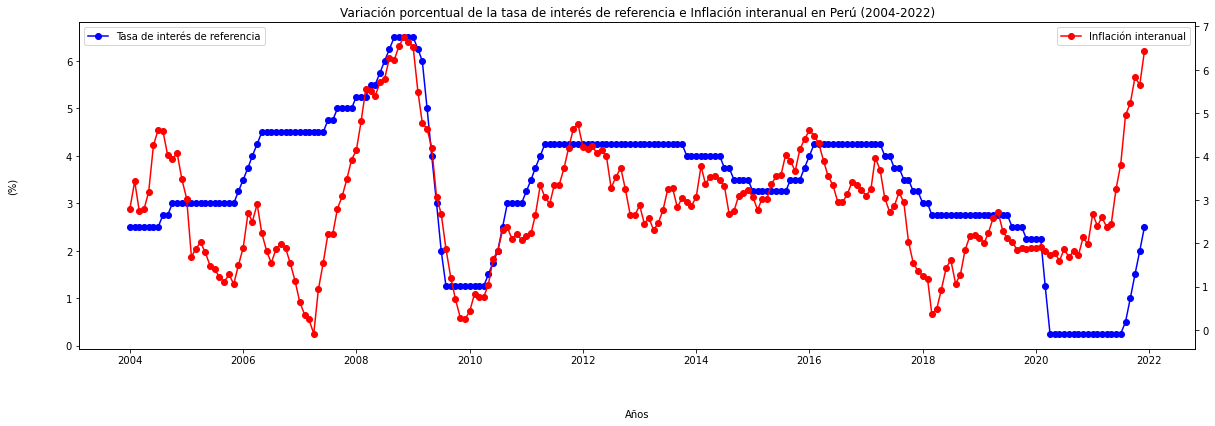

In [21]:
#Importamos las librerías correspondientes
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# hallamos los datos de la tasa de interés de referencia desde el API del BCRP
url_tasa = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD04722MM/json/2004/2022/esp"
response_tasas = requests.get(url_tasa)
data_tasa = response_tasas.json()
tasa_data = [{"month & year": item["name"], "tasa de interés de referencia": float(item["values"][0])} for item in data_tasa["periods"]]
df_tasa = pd.DataFrame(tasa_data) #obtuvimos el Dataframe de la la tasa de interes de referencia

# hallamos los datos de la inflación interanual desde el API del BCRP
url_inflacion = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01273PM/json/2004/2022/esp"
response_inflacion = requests.get(url_inflacion)
data_inflacion = response_inflacion.json()
inflacion_data = [{"month & year": item["name"], "inflacion": float(item["values"][0])} for item in data_inflacion["periods"]]
df_inflacion = pd.DataFrame(inflacion_data) #obtuvimos el Dataframe de la inflacion interanual

#Es necesario traducir al inglés los meses del año para un mejor análisis, veamos:
month_change = {
    'Ene': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dic': 'Dec'
}

# Desde una función, pasamos a convertir los nombres de los meses al inglés
def convert_month_name(date_str):
    for esp, eng in month_change.items():
        date_str = date_str.replace(esp, eng)
    return date_str

# Colocamos la función a la columna 'month & year'
df_tasa['month & year'] = df_tasa['month & year'].apply(convert_month_name)
df_inflacion['month & year'] = df_inflacion['month & year'].apply(convert_month_name)

# Convertimos la columna 'month & year' a formato datetime
df_tasa['month & year'] = pd.to_datetime(df_tasa['month & year'], format='%b.%Y')
df_inflacion['month & year'] = pd.to_datetime(df_inflacion['month & year'], format='%b.%Y')

# Ordenamos adecuadamente el DataFrame por fecha
df_tasa.sort_values('month & year', inplace=True)
df_inflacion.sort_values('month & year', inplace=True)

# Creamos un único DataFrame combinando ambas tasas
df_combined = pd.merge(df_tasa, df_inflacion, on='month & year', how='outer')

# Creamos el gráfico combinado
fig, ax1 = plt.subplots(figsize=(20, 6))

# Graficamos las tasas de interés de referencia
ax1.plot(df_combined['month & year'], df_combined['tasa de interés de referencia'], label='Tasa de interés de referencia', color='blue', marker='o')

# Creamos un segundo eje y para la inflación
ax2 = ax1.twinx()
ax2.plot(df_combined['month & year'], df_combined['inflacion'], label='Inflación interanual', color='red', marker='o')

# Configuramos leyendas y título
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Variación porcentual de la tasa de interés de referencia e Inflación interanual en Perú (2004-2022)')

# Agregar nombres de ejes
ax1.text(0.5, -0.2, 'Años', ha='center', va='center', transform=ax1.transAxes)
ax1.text(-0.06, 0.5, '(%)', ha='center', va='center', transform=ax1.transAxes, rotation='vertical')

# Mostrar el gráfico
plt.show()


Análisis del gráfico: 

La evolución de la Tasa de Interés de Referencia y la Inflación interanual, según los datos del BCRP, revela patrones interesantes. Durante los primeros años estudiados, especialmente desde el 2005, la tasa de referencia superó la inflación, indicando una política monetaria restrictiva. Sin embargo, entre 2009 y 2010, ambas tasas experimentaron una disminución, posiblemente como respuesta a la crisis financiera global. A partir del 2010, se observa una relativa estabilidad hasta el 2020, donde la inflación supera a la tasa de referencia.  Este cambio se debe a los cambios económicos que ocurrieron a nivel mundial por la pandemia. 

A raíz de la covid-19, la disminución de la tasa de referencia en 2020 podría haber sido una respuesta a la necesidad de facilitar el acceso al crédito y estimular la inversión en un entorno de incertidumbre económica. Por otro lado, la inflación interanual pudo haber reflejado tanto la caída en la demanda como las presiones inflacionarias derivadas de la interrupción de las cadenas de suministro y cambios en los patrones de consumo. Este análisis destaca cómo eventos extraordinarios, como la pandemia, pueden influir en la dinámica macroeconómica y la toma de decisiones de política monetaria.